In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import ahocorasick

from choropleth_functions import *

In [9]:
def word_search(words, text, df):
    auto = ahocorasick.Automaton()

    # Add state terms to Aho-Korasick mapping object
    for substr in words:
        auto.add_word(substr, substr)
    auto.make_automaton()

    text = list(np.char.upper(text))

    matches = [''] * len(text)

    for i, astr in enumerate(text):
        matches[i] = ''
        # If match found, access label via dictionary
        for _, found in auto.iter(astr):
            matches[i] = found 

    #df['match'] = matches
    df = df.loc[np.array(matches) != '']
    #df = df.drop(['urls', 'profile_location', 'geotag_location', 'geotag_country'], axis=1)
    return df

def subset_date(df, dates):
    if type(dates) != list:
        dates = [dates]

    inds = np.zeros(df.shape[0])

    for date in dates:
        tmp_inds = [x[0:7] == date for x in df.created_at.values]   
        inds = inds + 1*np.array(tmp_inds)
    
    return df[list(map(bool,inds))]

def sample(kw, state, dates, n_samples = 10):
    df = fetch_data_kw(kw)
    df = subset_date(df, dates)

    if state != "ALL":
        print(df[df.state == state].sample(n_samples).values)
    else:
        print(df.sample(n_samples).values)

def print_freq(kw, kw2, state, date):
    df = fetch_data_kw(kw)
    df = subset_date(df, date)
    df = df[df.state == state]
    print('Full Count: ', df.shape[0])

    tweet_text = df['text'].values
    tweet_text = tweet_text.astype('<U140')

    # "REP"
    df2 = word_search(kw2, tweet_text, df)
    print('Second Keyword Count: ', df2.shape[0])

    print('Percent: ', np.round((df2.shape[0] / df.shape[0])*100))

def plotty(kw, kw2, state, date, renderer = 'png'): 

    df = fetch_data_kw(kw)
    df = subset_date(df, date)
    df = df[df.state == state]

    og_count = df.shape[0]
    tweet_text = df['text'].values
    tweet_text = tweet_text.astype('<U140')
    
    df = word_search(kw2, tweet_text, df)

    count = df.shape[0]


    state_count = build_dataframe(kw, [date])
    state_count.index = state_count.State.values

    state_cts = pd.read_csv('/media/johnattan/LaCie/Twitter_Terms/State_Counts/' + date + '.csv')
    total_count = np.sum(state_cts[state_cts.State == state].Counts.values) 

    newval = (og_count - count) / total_count

    state_count.at[state, 'Count'] = newval
    #state_count['Count'] = [x.Count - count if x.State == state in list(state_count.Count.values)]

    fig = go.Figure(data=go.Choropleth(
        locations=state_count.State, # Spatial coordinates
        z = state_count.Count, # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        #colorbar_title = "Tweet Counts / Tweet Volume",
        zmin = 0,
        zmax = max(state_count['Count']),
        colorbar_title = "tweets"
    ))

    if kw == '':
        fig.update_layout(
            title_text = 'Tweets related to Covid-19',
            geo_scope='usa', # limite map scope to USA
        )
    else:
        fig.update_layout(
            title_text = 'Tweets related to Covid-19 and ' + kw + ' ' + date,
            geo_scope='usa', # limite map scope to USA
        )
    fig.show(renderer = renderer)


In [17]:
sample('LIQUOR', 'UT', '2020-06')

[["So in your #COVID19 life, Utah, you're not buying the cheap liquor. You're drinking GOOD in your self-quarantine life! @fox13 #utpol #utliquor https://t.co/TLW7yt5meG"
  '2020-06-30 18:15:02+00:00' 'UT']
 ['NEW: @UTDABC says it will re-open Pioneer Park and N. Temple (Fairpark area) liquor stores that were closed because an employee tested positive for #COVID19. Stores sanitized, opening at 11a tomorrow. Social distancing enforced, face masks encouraged for customers. @fox13 #utpol'
  '2020-06-03 04:13:42+00:00' 'UT']
 ['.@GovHerbert announces an executive order MANDATING face masks in ALL state-run facilities (that includes schools and liquor stores). That was in consultation with the #utleg. @fox13 #utpol #Utah #COVID19'
  '2020-06-25 02:31:10+00:00' 'UT']
 ['DABC to close two liquor stores after employee tests positive for COVID-19 https://t.co/dDyY6Y4n1K'
  '2020-06-01 14:22:06+00:00' 'UT']
 ['Two liquor stores in Salt Lake City are closed until further notice after an employee 

In [49]:
print_freq('WINE', ['WINE BAR', 'GOVERNOR'], 'RI', '2020-12')

Full Count:  71
Second Keyword Count:  49
Percent:  69.0


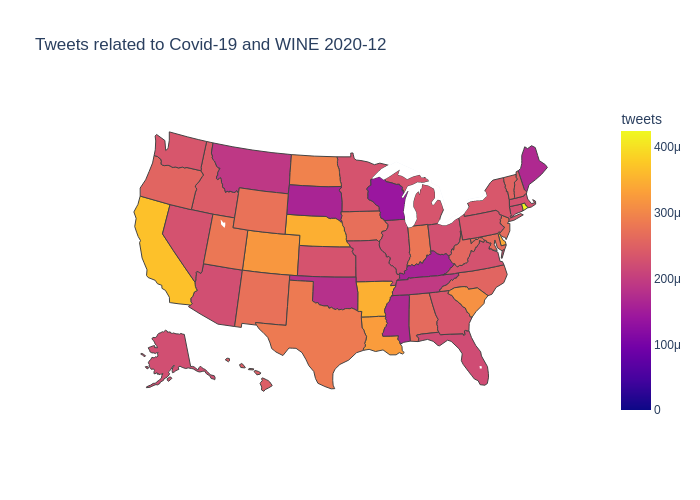

In [50]:
plotty('WINE', ['WINE BAR', 'GOVERNOR'], 'RI', '2020-12')

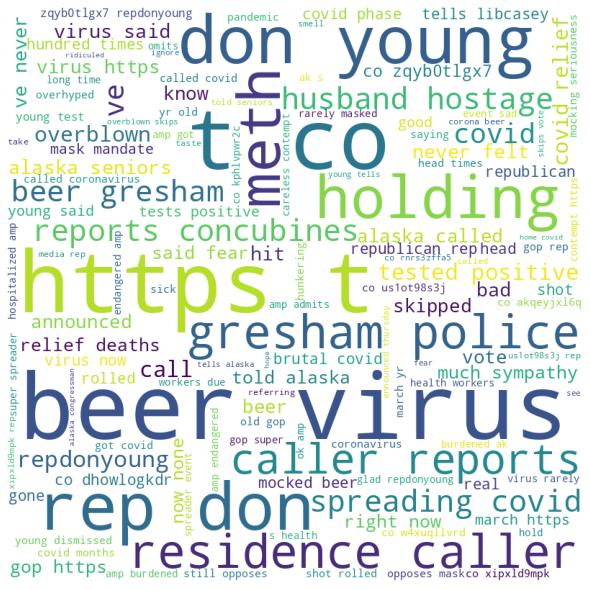

In [5]:
 
# Reads 'Youtube04-Eminem.csv' file
#df = pd.read_csv(r"Youtube04-Eminem.csv", encoding ="latin-1")
 
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df.text:#df.CONTENT:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [44]:
test = ['DeWine says he has no answers on whether COVID-19 spread has been related to protest, but he encourages that the question be asked again soon and thinks he may have more data eventually.']
print(np.char.find(np.char.upper(test), " WINE"))

[-1]
